In [1]:
import csv
import tweepy
import pandas as pd
import re
import string
import nltk
import time
from nltk.corpus import words
from textblob import TextBlob

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# set the path of the data set
df1 = pd.read_csv("/Users/sachinim/Desktop/TelecommunicationData1.csv" ,header = None)
df1.columns = ['date', 'tweet']
df2 = pd.read_csv("/Users/sachinim/Desktop/TelecommunicationData2.csv" ,header = None)
df2.columns = ['date', 'tweet']

df = df1.append(df2, ignore_index = True)


In [3]:
df.columns = ['date', 'tweet']

In [4]:
df=df.drop_duplicates(subset='tweet', keep="last")

In [5]:
pd.set_option('display.max_colwidth', None)
df

,date,tweet
0,2021-03-14 08:58:42,b'The following peaked during this scene:\n#Hollywood\n#screenwriting\n#dialog\n#GreatDepression\n#neckties\xe2\x80\xa6 https://t.co/rVQ8TBNx3o'
1,2021-03-13 17:45:03,"b'How To Keep A #Conversation Going: 10 Ways To Connect And Engage With Anyone, Anywhere - @westfallonline - @Forbes\xe2\x80\xa6 https://t.co/otZU2Pqx9F'"
3,2021-03-12 17:15:27,b'Video link :- https://t.co/d6DOgxBjew\n\n#yaarltech #dialog #offers #SriLanka https://t.co/kGuswiMBZs'
4,2021-03-12 05:04:04,b'Rajendra Theagarajah appointed Chairman of Digital Reality Pvt Ltd https://t.co/GuCbOsAPqQ \n\n#digitalreality\xe2\x80\xa6 https://t.co/0XLdpyNWje'
5,2021-03-11 22:24:36,"b'RT @djangoralph: Album Review: Sicker Man - Dialog (2021, blank records)\nNoise / Electronica / Krautrock from Berlin, Germany\nhttps://t.co/\xe2\x80\xa6'"
...,...,...
3908,2021-03-07 10:17:19,b'@ConsciYashhness @Airtel_Presence Hey! I agree with you when it comes to #airtel customer service their assurances\xe2\x80\xa6 https://t.co/M1qL0kl9SI'
3909,2021-03-07 10:10:27,b'@gauravcsawant I hope @airtelindia comes around this. Otherwise people who have been so kind to Jio can be equally\xe2\x80\xa6 https://t.co/tD6IdMLHQz'
3910,2021-03-07 09:46:19,"b""@AirtelNigeria @Airtel_Presence still waiting for my refund it's been more than 48 hours \xf0\x9f\xa4\xa6\xe2\x80\x8d\xe2\x99\x80\xef\xb8\x8f #airtel #airtelripoff #airtelnigeria"""
3911,2021-03-07 09:43:59,"b'So, is this the final nail in the coffin of #BhartiAirtel?? Is this truly the end of #Airtel?\n\nhttps://t.co/AsVS2Hp5S0'"


In [6]:
words = set(nltk.corpus.words.words())

In [7]:
def text_lemmatizer(text):
  # This function is used to lemmatize the given sentence
    lemmatizer =  WordNetLemmatizer ()
    token_words = word_tokenize(text)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(lemmatizer.lemmatize(word))
    return " ".join(stem_sentence)

In [8]:
# Remove special characters from the tweet
def clean_text(tweet):
    
    tweet = tweet.lower()
    
    # have to remove "b'RT @endaburke81" at the begining of the tweet
    if(tweet[:4]=="b'rt"):
        tweet = tweet.split(":", 1)[1]

    # splitting the tweet
    tweet = tweet.split()
    
    # Joining the tweet
    tweet = " ".join(tweet)
    
    #Removing digits and numbers
    tweet = "".join([i for i in tweet if not i.isdigit()])
    
    # Removing special characters from the tweet
    tweet = re.sub(f'[{re.escape(string.punctuation)}]', "", tweet)
    
    # cleaning = nltk.tokenize.wordpunct_tokenize(tweet)
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if w.lower() in words or not w.isalpha())
    
    tweet = text_lemmatizer(tweet)
    
    return tweet

In [9]:
df["tweet_clean"] = df["tweet"].apply(clean_text)
df

,date,tweet,tweet_clean
0,2021-03-14 08:58:42,b'The following peaked during this scene:\n#Hollywood\n#screenwriting\n#dialog\n#GreatDepression\n#neckties\xe2\x80\xa6 https://t.co/rVQ8TBNx3o',following peaked during this
1,2021-03-13 17:45:03,"b'How To Keep A #Conversation Going: 10 Ways To Connect And Engage With Anyone, Anywhere - @westfallonline - @Forbes\xe2\x80\xa6 https://t.co/otZU2Pqx9F'",to keep a conversation going way to connect and engage with anyone anywhere
3,2021-03-12 17:15:27,b'Video link :- https://t.co/d6DOgxBjew\n\n#yaarltech #dialog #offers #SriLanka https://t.co/kGuswiMBZs',link
4,2021-03-12 05:04:04,b'Rajendra Theagarajah appointed Chairman of Digital Reality Pvt Ltd https://t.co/GuCbOsAPqQ \n\n#digitalreality\xe2\x80\xa6 https://t.co/0XLdpyNWje',chairman of digital reality
5,2021-03-11 22:24:36,"b'RT @djangoralph: Album Review: Sicker Man - Dialog (2021, blank records)\nNoise / Electronica / Krautrock from Berlin, Germany\nhttps://t.co/\xe2\x80\xa6'",album review sicker man blank from berlin
...,...,...,...
3908,2021-03-07 10:17:19,b'@ConsciYashhness @Airtel_Presence Hey! I agree with you when it comes to #airtel customer service their assurances\xe2\x80\xa6 https://t.co/M1qL0kl9SI',hey i agree with you when it come to customer service their
3909,2021-03-07 10:10:27,b'@gauravcsawant I hope @airtelindia comes around this. Otherwise people who have been so kind to Jio can be equally\xe2\x80\xa6 https://t.co/tD6IdMLHQz',i hope come around this otherwise people who have been so kind to can be
3910,2021-03-07 09:46:19,"b""@AirtelNigeria @Airtel_Presence still waiting for my refund it's been more than 48 hours \xf0\x9f\xa4\xa6\xe2\x80\x8d\xe2\x99\x80\xef\xb8\x8f #airtel #airtelripoff #airtelnigeria""",still waiting for my refund it been more than
3911,2021-03-07 09:43:59,"b'So, is this the final nail in the coffin of #BhartiAirtel?? Is this truly the end of #Airtel?\n\nhttps://t.co/AsVS2Hp5S0'",is this the final nail in the coffin of is this truly the end of


In [10]:
# sentiment analysis using polarity

df['sentiment'] = ' '
df['polarity'] = None
for i,tweets in enumerate(df.tweet_clean) :
    blob = TextBlob(tweets)
    df['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        df['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        df['sentiment'][i] = 'negative'
    else :
        df['sentiment'][i] = 'neutral'
df.head()

,date,tweet,tweet_clean,sentiment,polarity
0,2021-03-14 08:58:42,b'The following peaked during this scene:\n#Hollywood\n#screenwriting\n#dialog\n#GreatDepression\n#neckties\xe2\x80\xa6 https://t.co/rVQ8TBNx3o',following peaked during this,neutral,0
1,2021-03-13 17:45:03,"b'How To Keep A #Conversation Going: 10 Ways To Connect And Engage With Anyone, Anywhere - @westfallonline - @Forbes\xe2\x80\xa6 https://t.co/otZU2Pqx9F'",to keep a conversation going way to connect and engage with anyone anywhere,neutral,0
3,2021-03-12 17:15:27,b'Video link :- https://t.co/d6DOgxBjew\n\n#yaarltech #dialog #offers #SriLanka https://t.co/kGuswiMBZs',link,neutral,0
4,2021-03-12 05:04:04,b'Rajendra Theagarajah appointed Chairman of Digital Reality Pvt Ltd https://t.co/GuCbOsAPqQ \n\n#digitalreality\xe2\x80\xa6 https://t.co/0XLdpyNWje',chairman of digital reality,neutral,0
5,2021-03-11 22:24:36,"b'RT @djangoralph: Album Review: Sicker Man - Dialog (2021, blank records)\nNoise / Electronica / Krautrock from Berlin, Germany\nhttps://t.co/\xe2\x80\xa6'",album review sicker man blank from berlin,negative,-0.2


In [11]:
df.loc[df['sentiment'] == "negative"].shape

(200, 5)

In [12]:
df.loc[df['sentiment'] == "positive"].shape

(469, 5)

In [13]:
df.loc[df['sentiment'] == "neutral"].shape

(837, 5)

In [14]:
df.loc[df['sentiment'] == "negative"]

,date,tweet,tweet_clean,sentiment,polarity
5,2021-03-11 22:24:36,"b'RT @djangoralph: Album Review: Sicker Man - Dialog (2021, blank records)\nNoise / Electronica / Krautrock from Berlin, Germany\nhttps://t.co/\xe2\x80\xa6'",album review sicker man blank from berlin,negative,-0.2
11,2021-03-11 12:56:14,"b'Album Review: Sicker Man - Dialog (2021, blank records)\nNoise / Electronica / Krautrock from Berlin, Germany\xe2\x80\xa6 https://t.co/ynEhYj3yz8'",review sicker man blank from berlin,negative,-0.166667
48,2021-03-14 12:07:39,"b'Best 3GB Per Day Data Plans You Can Avail From Airtel, Reliance Jio And BSNL #Telecom #technologynews \nhttps://t.co/abALtiTo9C'",per day data you can avail from reliance and,negative,-0.1
86,2021-03-14 02:47:16,"b'#PLDT, #Globe units unveil new business solutions\n\n#BeyondFibre @PLDT\n#CloudConnect @enjoyGlobe\n\n#Philippines\xe2\x80\xa6 https://t.co/yxz85LrEoH'",globe unveil new business,negative,-0.005
194,2021-03-13 10:33:20,b'RT @ETTelecom: Production Linked Incentive scheme in telecom: A \xe2\x80\x98towering\xe2\x80\x99 initiative #PLI #Telecom #IoT #PLIScheme #CPE #Policy https://t\xe2\x80\xa6',production linked incentive scheme in a initiative policy,negative,-0.1
...,...,...,...,...,...
2530,2021-03-14 19:48:14,b'Advertising experts helping businesses of all kind!\n#ubaamerica #gtbank #Airtel #mtnghana #businessgrowth\xe2\x80\xa6 https://t.co/WaaCTVdmBD',helping of all,negative,-0.133333
2560,2021-03-14 11:33:13,"b'Its been 3 months now when i started complaining about network, call dropping and internet issues. Nothing has\xe2\x80\xa6 https://t.co/iBLkKNrB2C'",been now when i about network call dropping and nothing,negative,-0.1
2564,2021-03-14 10:07:30,b'@Airtel_Presence @TRAI airtel broadband not worked with VPN. We are getting Harraas by @Airtel_Presence. No coopera\xe2\x80\xa6 https://t.co/iqG9aebJE9',not worked with we are getting by no,negative,-0.65
2566,2021-03-14 09:40:24,b'RT @ShekhawatShiv: AIRTEL service very low last two day call drop problem in jaipur and data problam please shoot out #AirtelDown #netwo\xe2\x80\xa6',service very low last two day call drop problem in and data please shoot out,negative,-0.65


In [15]:
#Split the data

x_train, x_test, y_train, y_test = train_test_split(df["tweet_clean"], df["sentiment"],test_size=0.2, random_state=0)

In [16]:
# Tokenize Words in each tweets (Encoding)
# TfidfVectorizer converts text to word frequency vectors

tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
tfidf_vectorizer.fit(df["tweet_clean"])
x_train_vector = tfidf_vectorizer.transform(x_train)
x_test_vector = tfidf_vectorizer.transform(x_test)

In [17]:
def evaluate_metrics(y_test, y_hat, model_type,time):
    
    accuracy = accuracy_score(y_hat, y_test)
    print("Model Type : ", model_type)
    print("\nAccuracy : ", format(accuracy, '.2f'))
    print("\nTraining Time : ", format(time, '.2f'), "s" )
    print("\n", classification_report(y_hat, y_test))

    
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix(y_hat, y_test), annot=True, fmt=".2f")
    plt.show()
    return accuracy

In [18]:
# Maximum Entropy (Logistic Regression Algorithm)

logisticR_model = LogisticRegression()
logisticR_start = time.time()
logisticR_model.fit(x_train_vector, y_train)
logisticR_stop = time.time()
logisticR_time = (logisticR_stop - logisticR_start)
logisticR_preds = logisticR_model.predict(x_test_vector)

Model Type :  Logistic Regression Classifier

Accuracy :  0.66

Training Time :  0.21 s

               precision    recall  f1-score   support

                   0.78      0.92      0.84       226
    negative       0.00      0.00      0.00        30
     neutral       0.57      0.72      0.63       172
    positive       0.29      0.09      0.14        87

    accuracy                           0.66       515
   macro avg       0.41      0.43      0.40       515
weighted avg       0.58      0.66      0.60       515



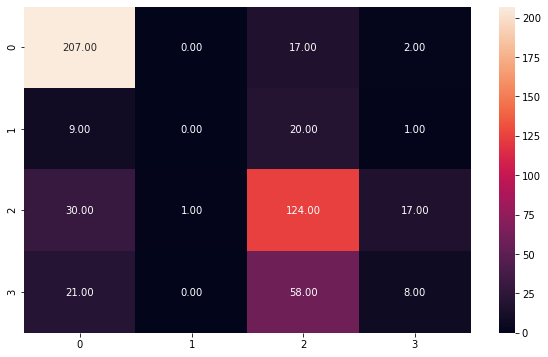

In [19]:
logisticR_accuracy = evaluate_metrics(logisticR_preds, y_test, "Logistic Regression Classifier", logisticR_time)

In [20]:
# Random Forest Algorithm

RandomForest_model = RandomForestClassifier()
RandomForest_start = time.time()
RandomForest_model.fit(x_train_vector, y_train)
RandomForest_stop = time.time()
RandomForest_time = (RandomForest_stop - RandomForest_start)
RandomForest_preds = RandomForest_model.predict(x_test_vector)

Model Type :  Random Forest Classifier

Accuracy :  0.63

Training Time :  1.68 s

               precision    recall  f1-score   support

                   0.80      0.91      0.85       226
    negative       0.05      0.03      0.04        30
     neutral       0.54      0.64      0.58       172
    positive       0.22      0.08      0.12        87

    accuracy                           0.63       515
   macro avg       0.40      0.42      0.40       515
weighted avg       0.57      0.63      0.59       515



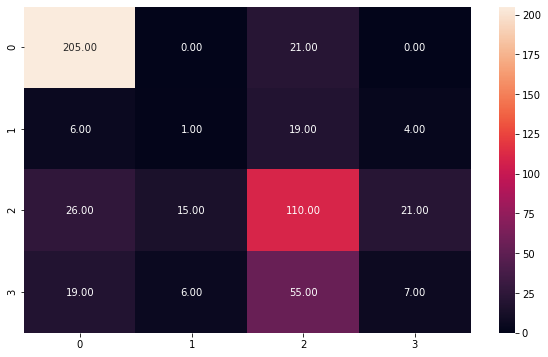

In [21]:
RandomForest_accuracy = evaluate_metrics(RandomForest_preds, y_test, "Random Forest Classifier", RandomForest_time)

In [22]:
# Decision Tree Algorithm

DecisionTree_model = DecisionTreeClassifier(max_depth=20,random_state=0)
DecisionTree_start = time.time()
DecisionTree_model.fit(x_train_vector, y_train)
DecisionTree_stop = time.time()
DecisionTree_time = (DecisionTree_stop - DecisionTree_start)
DecisionTree_pred = DecisionTree_model.predict(x_test_vector)

Model Type :  DecisionTree Classifier

Accuracy :  0.53

Training Time :  0.05 s

               precision    recall  f1-score   support

                   0.67      0.76      0.71       226
    negative       0.06      0.03      0.04        30
     neutral       0.47      0.56      0.51       172
    positive       0.14      0.06      0.08        87

    accuracy                           0.53       515
   macro avg       0.33      0.35      0.34       515
weighted avg       0.48      0.53      0.50       515



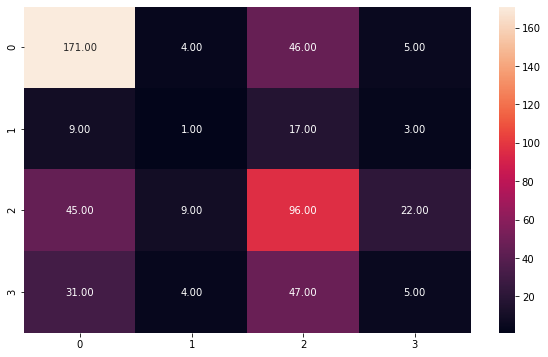

In [23]:
DecisionTree_accuracy = evaluate_metrics(DecisionTree_pred, y_test, "DecisionTree Classifier", DecisionTree_time)

In [24]:
# Support Vector Machine Algorithm (Linear SVC classifier)

svm_model = svm.SVC(kernel='linear')
svm_start = time.time()
svm_model.fit(x_train_vector, y_train)
svm_stop = time.time()
svm_time = (svm_stop - svm_start)
svm_preds = svm_model.predict(x_test_vector)

Model Type :  Support Vector Machine

Accuracy :  0.67

Training Time :  0.42 s

               precision    recall  f1-score   support

                   0.82      0.91      0.86       226
    negative       0.00      0.00      0.00        30
     neutral       0.57      0.77      0.66       172
    positive       0.27      0.09      0.14        87

    accuracy                           0.67       515
   macro avg       0.41      0.44      0.41       515
weighted avg       0.60      0.67      0.62       515



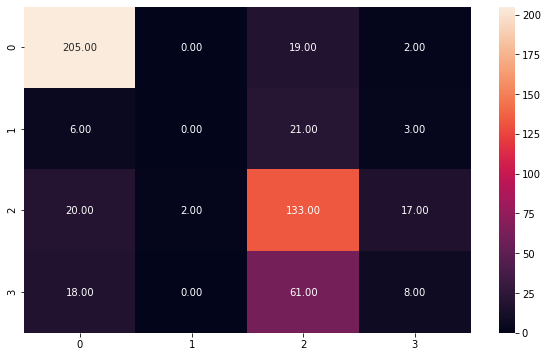

In [25]:
svm_accuracy = evaluate_metrics(svm_preds, y_test, "Support Vector Machine", svm_time)

In [26]:
# Multinomial Naive Bayes Algorithm

MultinomialNB_model = MultinomialNB()
MultinomialNB_start = time.time()
MultinomialNB_model.fit(x_train_vector, y_train)
MultinomialNB_stop = time.time()
MultinomialNB_time = (MultinomialNB_stop - MultinomialNB_start)
MultinomialNB_preds = MultinomialNB_model.predict(x_test_vector)

Model Type :  Multinomial NB Classifier

Accuracy :  0.65

Training Time :  0.01 s

               precision    recall  f1-score   support

                   0.70      0.96      0.81       226
    negative       0.00      0.00      0.00        30
     neutral       0.58      0.69      0.63       172
    positive       0.40      0.02      0.04        87

    accuracy                           0.65       515
   macro avg       0.42      0.42      0.37       515
weighted avg       0.57      0.65      0.57       515



/Users/sachinim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


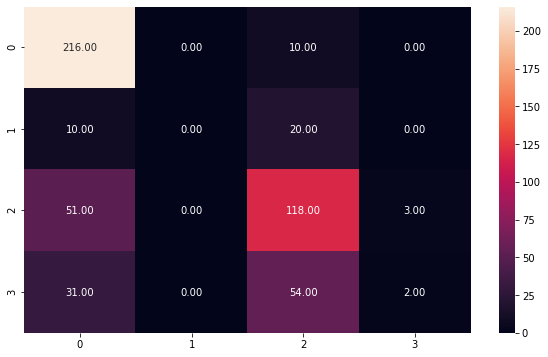

In [27]:
MultinomialNB_accuracy = evaluate_metrics(MultinomialNB_preds, y_test, "Multinomial NB Classifier", MultinomialNB_time)

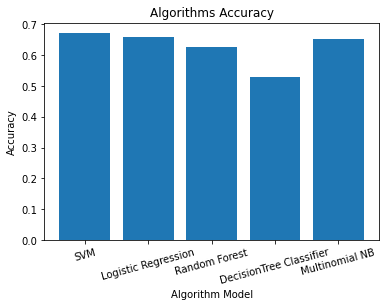

In [28]:
# Graph view of Accuracy

x = ["SVM","Logistic Regression","Random Forest", "DecisionTree Classifier", "Multinomial NB"]
y = [svm_accuracy,logisticR_accuracy,RandomForest_accuracy,DecisionTree_accuracy, MultinomialNB_accuracy]

plt.bar(x=x, height=y)
plt.title("Algorithms Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.xlabel("Algorithm Model")

plt.show()

In [29]:
import pickle

In [30]:
#save tfidf
with open("tfidf.pkl", 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [31]:
#save model
with open("model.pkl", 'wb') as file:
    pickle.dump(svm_model, file)

In [32]:
########### Load and get Predictions - Should goes to the backend 

with open("model.pkl", 'rb') as file:
    model = pickle.load(file)
    
with open("tfidf.pkl", 'rb') as file:
    tfidf = pickle.load(file)